**PRÁCTICA 5. TRANSFERENCIA DEL CONOCIMIENTO, DATA AUGMENTATION Y VISUALIZACIÓN INTERNA DE UNA CNN**

**Conceptos necesarios de teoría**:
Los de la práctica anterior + transfer learning, fine-tuning, data augmentation y tener claro que son las activaciones y los pesos de los filtros.

En la sesión anterior nos familizarizamos con las **redes neuronales convolucionales (CNN)** y la librería de desarrollo **Keras**. En esta última práctica vamos a trabajar con **arquitecturas CNN previamente propuestas en la literatura** para la clasificación de imágenes y para el **entrenamiento de nuevos modelos**  a partir de los ya existentes haciendo uso de técnicas las técnicas de **transferencia del conocimiento** y **fine-tuning**. Además comprobaremos como la técnica de aumento sintético de datos (***data augmentation*** del inglés) nos ayuda a mitigar el efecto de overfitting. Por último, aprenderemos los comandos Keras necesarios para **visualizar** tanto las **activaciones** a la salida de ciertas capas de la red como los **pesos de los filtros** de la mismas.

En primer lugar, aprovechando que vamos a necesitar un paquete que no está instalado en el entrono de desarrollo que nos ofrece Colab, vamos a aprender a **listar los paquetes instalados en el entorno de desarrollo** de la máquina asignada por Google y a **instalar nuevos**.

Introduciendo un **símbolo de exclamación (!)** y a continuación una **instrucción del sistema** (i.e. cd, mkdir, rm, etc.) ésta es reconocida sin ningún problema y **ejecutada en la máquina que tenemos por detrás de nuestro Colab**. Por otra parte, tal y como veremos en la sesión teórica "Hardware/Software necesario para aplicar aprendizaje profundo" instalando la **herramienta *pip*** en el sistema seré capaz (a través de dicho comando) de **instalar todos los paquetes necesarios en un determinado entorno de desarrollo** (ya veremos este concepto) destinado a técnicas de aprendizaje profundo. ¿Y como puedo entonces observar los **paquetes** que llevo **instalados** (en este caso nos los instaló Google) en mi entorno de desarrollo? Pues **ejecutando** la instrucción de la siguiente celda:

In [ ]:
!pip freeze

absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.0.1
asgiref==3.2.3
astor==0.8.1
astropy==4.0
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.4.0
boto==2.49.0
boto3==1.11.15
botocore==1.14.15
Bottleneck==1.3.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.11.28
cffi==1.14.0
chainer==6.5.0
chardet==3.0.4
chart-studio==1.0.0
Click==7.0
cloudpickle==1.2.2
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.0
cupy-cuda101==6.5.0
cvxopt==1.2.4
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.3
Cython==0.29.15
daft==0.0.4
dask==2.9.2
dataclasses==0.7
datascience==0.10.6
decorator==4.4.1
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0.3
dlib==19.18.0
dm-sonnet==1.3

¿Habéis visto la cantidad de paquetes que nos prepara Google para que desarrollemos haciendo uso de una gran infinidad de librerias? Hay que decir que de todas esas **librerias** las que a nosotros nos interesan son las destinadas al **aprendizaje profundo (TensorFlow-gpu y Keras)**, las de **procesado de señal e imagen (openCV, pillow, etc.)** y **visualización (matplotlib)**. A pesar de todas las librerías que tenemos instaladas, podemos comprobar que la librería  ***imageio*** no está y vamos a necesitarla. Dicha librería tiene propósitos de lectura y escritura de imágenes ofreciendo compatibilidad con la representación en Google Colab. **Vamos a** proceder a **instalarla** con el comando de la siguiente celda de código:

In [ ]:
# Cuando requiero de un paquete que no está instalado en la máquina que hay por detrás de Colab puedo instalarlo así
!pip install imageio

Bueno pues ya sabemos listar e instalar nuevos paquetes en nuestro entorno de desarrollo. Vamos a comenzar con lo que realmente nos interesa en esta práctica, vamos a **cargar una arquitectura de red existente** de las que hemos visto en la sesión teórica y utilizarla para predecir unas cuantas imágenes que vamos a descargar a continuación.

En la práctica anterior vimos como establecer conexión entre nuestro *notebook* de Colab y nuestro google Drive con el objetivo de cargar imágenes en memoria almacenadas en nuestra unidad Drive. En esta sesión vamos a aprender  como **descargar imágenes** (previamente subidas a cierto proveedor de servicios como puede ser https://image.ibb.co) **directamente en la máquina que tenemos detrás de Colab**. Empleando el comando del sistema ***wget*** es posible descargar un contenido en dicha máquina, así que vamos a ello:

In [ ]:
!wget https://image.ibb.co/cuw6pd/soccer_ball.jpg

--2020-02-22 09:27:18--  https://image.ibb.co/cuw6pd/soccer_ball.jpg
Resolving image.ibb.co (image.ibb.co)... 104.194.8.196, 172.96.140.18
Connecting to image.ibb.co (image.ibb.co)|104.194.8.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37935 (37K) [image/jpeg]
Saving to: ‘soccer_ball.jpg’

soccer_ball.jpg     100%[===================>]  37.05K   224KB/s    in 0.2s    

2020-02-22 09:27:19 (224 KB/s) - ‘soccer_ball.jpg’ saved [37935/37935]



**Listemos** ahora el **contenido del directorio de trabajo** (de la máquina asignada por Google) para comprobar que la imágen se ha almacenado con éxito:

In [ ]:
!ls -la *.jpg*

-rw-r--r-- 1 root root 37935 Jun 16  2018 soccer_ball.jpg


Como ya sabéis en el módulo ***keras.applications*** podemos encontrar una gran cantidad de métodos para importar arquitecturas de red previamente propuestas en la literatura. A continuación **vamos a cargar la aquitectura VGG16 y realizar unas cuantas predicciones**, pero antes **abre la documentación de *keras.applications*** haciendo click [aquí](https://keras.io/applications/) y **busca cada una de las funciones** de dicho módulo que se emplean en el código y lee acerca de las mismas.

Using TensorFlow backend.


[INFO]: Cargando VGG16...




553467904/553467096 [==============================] - 34s 0us/step






[[[ 99. 120.  63.]
  [ 87. 108.  51.]
  [ 84. 108.  48.]
  ...
  [ 86. 111.  28.]
  [ 87. 112.  28.]
  [ 88. 113.  29.]]

 [[100. 121.  64.]
  [ 89. 110.  53.]
  [ 86. 110.  50.]
  ...
  [ 85. 110.  27.]
  [ 86. 111.  27.]
  [ 86. 111.  27.]]

 [[102. 121.  66.]
  [ 93. 112.  56.]
  [ 91. 112.  55.]
  ...
  [ 85. 110.  27.]
  [ 85. 110.  26.]
  [ 83. 108.  24.]]

 ...

 [[ 15.  25.   0.]
  [ 66.  77.  43.]
  [ 19.  30.   0.]
  ...
  [ 77. 107.  45.]
  [ 22.  44.   0.]
  [ 98. 116.  66.]]

 [[ 53.  64.  34.]
  [ 62.  74.  38.]
  [ 18.  29.   0.]
  ...
  [ 66.  98.  33.]
  [ 42.  64.   0.]
  [ 86. 103.  49.]]

 [[ 25.  36.   4.]
  [ 99. 111.  71.]
  [ 45.  56.  22.]
  ...
  [ 62.  93.  25.]
  [ 45.  68.   0.]
  [ 74.  89.  32.]]]
[[[[ 99. 120.  63.]
   [ 87. 108.  51.]
   [ 84. 108.  48.]
   ...
   [ 86. 111.  28.]
   [ 87. 112.  28.]
   [ 88. 113.  29.]]

  [[100. 121.  64.]
   [ 89. 

(-0.5, 569.5, 378.5, -0.5)

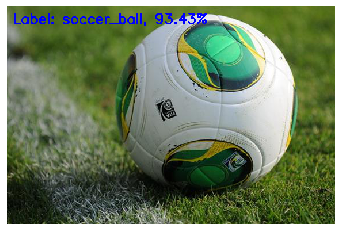

In [ ]:
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import imageio as io
import numpy as np
import cv2

# Cargamos la arquitectura de red del SoA con la que queremos predecir junto a sus pesos 
print("[INFO]: Cargando VGG16...")
input_shape = (224, 224)
model = VGG16(weights="imagenet") # ¡¡¡ Búscame en keras.applications !!!

# Cargamos la imagen, nos aseguramos de que el tamaño es el adecuado y almacenamos en array
image_source = "soccer_ball.jpg"
image = load_img(image_source, target_size=input_shape)  #target = input en el tamaño
image = np.resize(image, (input_shape[0], input_shape[1], 3))
image = img_to_array(image)

# Extendemos dimensiones (inputShape[0], inputShape[1], 3) para conseguir (1, inputShape[0], inputShape[1], 3)

image = np.expand_dims(image, axis=0)

# Pre-procesamos la imagen tal y como fueron pre-procesadas las imágenes que se emplearon para entrenar dicha red
image = imagenet_utils.preprocess_input(image) # ¡¡¡ Búscame en keras.applications !!!
      
# Predecimos la clase de nuestra imagen empleando el modelo
print("[INFO]: Clasificando imagen con el modelo VGG16")
preds = model.predict(image)
# Decodificamos las predicciones
P = imagenet_utils.decode_predictions(preds) # ¡¡¡ Búscame en keras.applications !!!

# Mostramos las predicciones Rank-5 y su probabilidad
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
      print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

# Cargamos la imagen con imageio para poder graficarla sin problemas en Colab
# Insertamos un cuadro de texto sobre la imagen indicando la etiqueta con mayor probabilidad y dicho valor
img = io.imread(image_source)
(imagenetID, label, prob) = P[0][0]
cv2.putText(img, "Label: {}, {:.2f}%".format(label, prob * 100), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
plt.imshow(img)
plt.axis('off')
  




---



**EJERCICIO 1.** Ahora que ya sabemos como cargar un modelo en concreto desde el módulo *applications* de Keras, vamos a crear una función que sea capaz de predecir una imagen con una de las siguientes arquitecturas del estado del arte: **VGG16**, **VGG19**, **ResNet50**, **InceptionV3** y **Xception**. La cabecera de la función será la siguiente:

>>> ```def predict_image(model_name, image_source)```

Ambos parámeros de entrada son **dos cadenas de texto**. La **primera** de ellas hace referencia al modelo que emplearemos para la predicción. Concretamente será la **clave de un diccionario** que deberemos crear. Este diccionario nos permitirá seleccionar la función necesaria para **importar el modelo** de interés empleando Keras. Dicha importación la haremos **descargando los pesos** de la arquitectura entrenados en **ImageNet** (de la misma forma que hemos hecho en el ejemplo anterior). La **segunda cadena** de texto será el **nombre de la imagen** a predecir. 

**Nota.** La primera vez que carguemos un modelo importando los pesos de ImageNet, éstos se descargarán de forma automática de un repositorio. Dependiendo de la arquitectura, este proceso puede tardar más o menos según el peso de los mismos (500MB si usamos VGGs, unos 100MB en los otros casos).

In [ ]:
# Importamos los paquetes necesarios
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception 
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import urllib
import cv2
import matplotlib.pyplot as plt
import imageio as io

def predict_image(model_name, image_source):
  
  # Definimos un diccionario que mapea el nombre de la red con el nombre de la función
  # necesaria para importar el modelo y descargar los pesos empleando Keras
  MODELS = {
    "ResNet50" : ResNet50,
    "inception" : InceptionV3,
    "xception" : Xception,
    "VGG16" : VGG16,
    "VGG19" : VGG19,
  }

  # Establecemos el tamaño de entrada y la función de preprocesamiento de imagen
  # En Keras están definidas las funciones de pre-procesamiento de cada red: 
  # Tamaño imagen de entrada: VGGs y ResNet (224,224); Inception y Xception (299,299)
  # Función para el pre-procesado: VGGs y ResNet --> imagenet_utils.preprocess_input
  # Inception y Xception --> inception_v3.preprocess_input
  
  # En caso que sean VGGs o ResNet
  input_shape = (224, 224)# Declaro dimensiones
  preprocesado = imagenet_utils.preprocess_input # Aplico preprocesado
  if model_name in ("inception", "xception"): # Si es Inception o Xception
    input_shape = (299, 299) # Declaro dimensiones
    preprocesado = preprocess_input  # Aplico preprocesado

  # Cargamos el modelo empleando la función de Keras obtenida como valor de la clave
  # del diccionario que nos pasan como string
  print("[INFO]: Cargando {}...".format(model_name))
  nombremodelo = MODELS[model_name] 
  model = nombremodelo(weights="imagenet")

  # Cargamos la imagen, nos aseguramos de que el tamaño es el adecuado y almacenamos en array (img_to_array)
  print("[INFO]: Cargando y pre-procesando la imagen...")
  image = load_img(image_source, target_size=input_shape)  #target = input en el tamaño
  image = np.resize(image, (input_shape[0], input_shape[1], 3))
  image = img_to_array(image)

  # Extendemos dimensiones para conseguir (1, inputShape[0], inputShape[1], 3)
  image = np.expand_dims(image, axis=0)

  # Pre-procesamos la imagen
  image = preprocesado(image)

  # Predecimos la clase de nuestra imagen y decodificamos
  print("[INFO] Clasificando la imagen con '{}'...".format(model_name))
  preds = model.predict(image)
  P = imagenet_utils.decode_predictions(preds)

  # Mostramos las predicciones rank-5 y su probabilidad
  for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

  # Cargamos la imagen con imageio para poder graficarla sin problemas en Colab
  # Insertamos un cuadro de texto sobre la imagen indicando la etiqueta con mayor probabilidad y este valor
  img = io.imread(image_source)
  (imagenetID, label, prob) = P[0][0]
  cv2.putText(img, "Label: {}, {:.2f}%".format(label, prob * 100), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
  plt.imshow(img)
  plt.axis('off')
  
  # Devolvemos el modelo para posteriormente mostrar información del mismo
  return model

In [ ]:
# Descargamos 3 imágenes más
!wget https://image.ibb.co/hdoVFJ/bmw.png
!wget https://image.ibb.co/h0B6pd/boat.png
!wget https://image.ibb.co/eCyVFJ/clint_eastwood.jpg


--2020-02-22 10:03:58--  https://image.ibb.co/hdoVFJ/bmw.png
Resolving image.ibb.co (image.ibb.co)... 104.194.8.196, 172.96.140.18
Connecting to image.ibb.co (image.ibb.co)|104.194.8.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347784 (340K) [image/png]
Saving to: ‘bmw.png’

bmw.png             100%[===================>] 339.63K   609KB/s    in 0.6s    

2020-02-22 10:04:00 (609 KB/s) - ‘bmw.png’ saved [347784/347784]

--2020-02-22 10:04:01--  https://image.ibb.co/h0B6pd/boat.png
Resolving image.ibb.co (image.ibb.co)... 104.194.8.196, 172.96.140.18
Connecting to image.ibb.co (image.ibb.co)|104.194.8.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327986 (320K) [image/png]
Saving to: ‘boat.png’

boat.png            100%[===================>] 320.30K   588KB/s    in 0.5s    

2020-02-22 10:04:02 (588 KB/s) - ‘boat.png’ saved [327986/327986]

--2020-02-22 10:04:03--  https://image.ibb.co/eCyVFJ/clint_eastwood.jpg
Resolving ima

In [ ]:
# Comprobamos que están en la máquina que nos asigna Colab
!ls -la *.*

-rw-r--r-- 1 root root 347784 Jun 16  2018 bmw.png
-rw-r--r-- 1 root root 327986 Jun 16  2018 boat.png
-rw-r--r-- 1 root root  36001 Jun 16  2018 clint_eastwood.jpg
-rw-r--r-- 1 root root  37935 Jun 16  2018 soccer_ball.jpg


- A continuación comprueba cómo **predicen** las distintas **arquitecturas** las **4 imágenes** descargadas. ¿Qué arquitectura efectúa unas **predicciones más precisas** en líneas generales? Visualiza los esquemas de las distintas arquitecturas de red empleando la instrucción de Keras **model.summary()**.

[INFO]: Cargando VGG16...
[INFO]: Cargando y pre-procesando la imagen...
[INFO] Clasificando la imagen con 'VGG16'...
1. convertible: 98.09%
2. sports_car: 0.63%
3. car_wheel: 0.43%
4. amphibian: 0.19%
5. beach_wagon: 0.18%
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
___________________________________

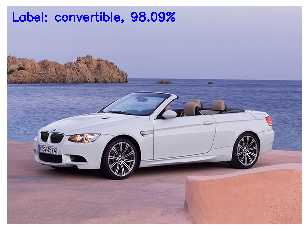

In [ ]:
# Predicciones para la imagen bwm.png para VGG16
predict_image('VGG16', 'bmw.png')
# Muestro arquitectura
model.summary()

[INFO]: Cargando VGG19...
574717952/574710816 [==============================] - 35s 0us/step
[INFO]: Cargando y pre-procesando la imagen...
[INFO] Clasificando la imagen con 'VGG19'...
1. convertible: 91.76%
2. sports_car: 4.98%
3. limousine: 1.06%
4. car_wheel: 0.75%
5. beach_wagon: 0.41%
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (Non

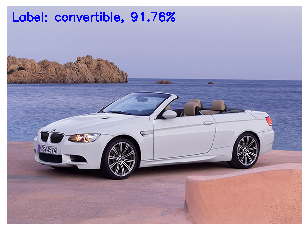

In [ ]:
# Predicciones para la imagen bwm.png para VGG19
predict_image('VGG19', 'bmw.png')
# Muestro arquitectura
model.summary()

[INFO]: Cargando inception...



96116736/96112376 [==============================] - 7s 0us/step
[INFO]: Cargando y pre-procesando la imagen...
[INFO] Clasificando la imagen con 'inception'...
1. convertible: 94.07%
2. sports_car: 1.09%
3. amphibian: 0.18%
4. space_bar: 0.12%
5. car_wheel: 0.05%


<bound method Network.summary of <keras.engine.training.Model object at 0x7f4ded748d30>>

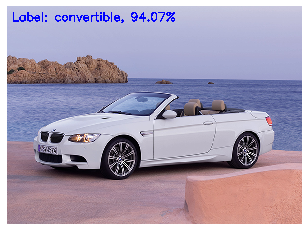

In [ ]:
# Predicciones para la imagen bwm.png para INCEPTION
predict_image('inception', 'bmw.png')
# Muestro arquitectura
model.summary

[INFO]: Cargando xception...
91889664/91884032 [==============================] - 7s 0us/step
[INFO]: Cargando y pre-procesando la imagen...
[INFO] Clasificando la imagen con 'xception'...
1. convertible: 94.89%
2. sports_car: 1.86%
3. amphibian: 0.21%
4. car_wheel: 0.04%
5. speedboat: 0.04%
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (No

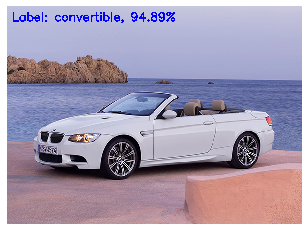

In [ ]:
# Predicciones para la imagen bwm.png para XCEPTION
predict_image('xception', 'bmw.png')
# Muestro arquitectura
model.summary()

[INFO]: Cargando ResNet50...

102858752/102853048 [==============================] - 7s 0us/step
[INFO]: Cargando y pre-procesando la imagen...
[INFO] Clasificando la imagen con 'ResNet50'...
1. convertible: 98.89%
2. sports_car: 0.94%
3. car_wheel: 0.12%
4. grille: 0.02%
5. beach_wagon: 0.01%
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (

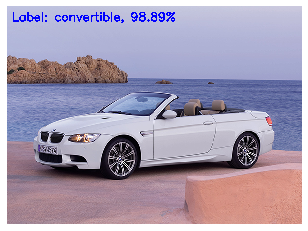

In [ ]:
# Predicciones para la imagen bwm.png para RESNET50
predict_image('ResNet50', 'bmw.png')
# Muestro arquitectura
model.summary()

- Por último, vamos a **predecir**, con las distintas arquitecturas del SoA, las **imágenes** (personales o descargadas de Internet) **que almacenamos en Google Drive en la práctica anterior** y que tratamos de predecir con la arquitectura de red que diseñamos para clasificar el dataset CIFAR10.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO]: Cargando ResNet50...
[INFO]: Cargando y pre-procesando la imagen...
[INFO] Clasificando la imagen con 'ResNet50'...
1. tabby: 30.64%
2. Egyptian_cat: 12.33%
3. tiger_cat: 8.87%
4. brassiere: 4.15%
5. bath_towel: 3.75%


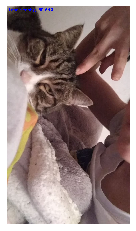

In [ ]:
from google.colab import drive
# Montamos nuestro Google Drive
drive.mount('/content/drive')
# Selecciono el path de Drive donde tengo la imagen (incluido el nombre de la misma)
img_path = "/content/drive/My Drive/Curso_DL_CFP/P6/mishu"
# Predecimos la imagen
predict_image('ResNet50', img_path)



---



Tal y como hemos visto en la sesión teórica, en muchas de las aplicaciones en las que queremos proponer una solución basada en aprendizaje profundo, los datos disponibles no son suficientes para obtener un buen modelo de predicción entrenando una CNN desde cero. Las técnicas de ***transfer learning*** y ***fine-tuning*** nos permiten **entrenar modelos precisos con conjuntos de datos limitados (i.e. unas 500-1000 muestras por clase)** evitando tener que:

- Definir la estructura de la red neuronal

- Entrenarla desde cero

Dichas técnicas se basan en **emplear arquitecturas CNN predefinidas** y **que fueron entrenadas en** el conjunto de datos **ImageNet** ofreciendo notables resultados: **ResNet, AlexNet, VGG, Inception, DenseNet, etc**.

Como ya sabéis, las redes se inicializan con unos pesos aleatorios (normalmente) que tras una serie de épocas consiguen tener unos valores que permiten clasificar adecuadamente nuestras imágenes de entrada.

¿Qué pasaría **si pudiésemos inicializar** esos **pesos a unos valores que sabemos que ya son buenos para clasificar un determinado dataset**?

De esta forma, **no necesitaríamos** ni un **dataset tan grande** como el necesario si queremos entrenar una red de cero (de cientos de miles o incluso millones de imágenes podríamos pasar a unas pocas miles) **ni** necesitaríamos **esperar un buen número de épocas a que los pesos cogiesen valores buenos para la clasificación**, lo tendrían mucho más fácil debido a su inicialización. Vamos a poner en práctica las dos técnicas más comunes para realizar lo que buscamos y entender las diferencias entre ellas: **Transfer learning** y **Fine-tuning**.



---



Como hemos visto en el apartado teórico, **ImageNet** consiste en un dataset de más o menos **1,2 millones de imágenes** para **entrenamiento**, **50.000 para validación** y **100.000 para test**, pertenecientes a **1000 categorías**.

Si recordamos el **esquema general de una CNN**, tenemos un **extractor de características** en la primera etapa (**base model**) y después la **etapa de clasificación** (**top model**) tal y como podemos ver en la siguiente figura:

![CNN](https://drive.google.com/uc?id=1CApqq7Hmc5gxuzxMQXgrFs8hJ3MJUh4k)

Pues bien, la técnica de **transferencia del conocimiento** se basa en **aprovechar los valores de los pesos** (i.e. conocimiento) que adquirieron los filtros involucrados en la CNN cuando fue entrenada en el conjunto de datos **ImageNet**. La idea es dejar "congelados" los pesos de estas capas y **añadir un *top model* ad-hoc a nuestra aplicación**, en el que la última capa tendrá tantas neuronas como clases en las que queremos clasificar. **También** podriamos **guardar las características** (i.e. mapa de activación) de la **última capa** (Pooling Later 3 en el caso de la figura) **y entrenar modelos de predicción** basados en otro tipo de **algoritmos de clasificación** (i.e. Random Forests, SVMs, regresión logística, k-NN, etc.).

En el siguiente ejemplo vamos a **cargar cierto modelo** del estado del arte (VGG16 en nuestro caso) y vamos a **aprender** cómo **congelar los pesos** y establecer un ***top model* propio**.

58892288/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

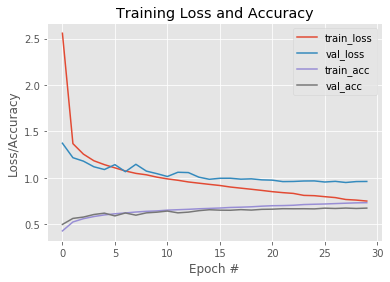

In [ ]:
# Como siempre los imports que necesitaremos
from keras.datasets import cifar10
from keras.applications import VGG16
from keras.applications import imagenet_utils
from tensorflow.keras import optimizers
from keras.layers import Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from keras.engine import Model
from sklearn.metrics import classification_report
import numpy as np

# Cargamos el dataset CIFAR10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Si quisieramos pasar a etiquetas en one-hot-encoding (caso de usar categorical_crossentropy en vez de sparse_categorical_crossentropy)
#Y_train = to_categorical(y_train)
#Y_test = to_categorical(y_test)

# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar la VGG16 en imageNet
X_train = imagenet_utils.preprocess_input(X_train)
X_test = imagenet_utils.preprocess_input(X_test)
# Definimos nuestra lista con el nombre de las clases
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]
# Fijamos las dimensiones a las que vamos a re-entrenar el top model. OJO!! con esto 
# porque si nos traemos también el top_model las dimensiones tendrán que ser identicas
# a las de las imágenes con las que se entrenaron la red (no es nuestro caso), lee la documentación en keras.applications.
input_shape = (256, 256, 3)

# Importamos el modelo con los pesos de imageNet y SIN incluir el top model (i.e. multilayer perceptron para clasificar)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables
base_model.summary()

# Procedemos a congelar TODAS las capas de nuestro base_model para que no se entrenen
# queremos que nuestro feature extractor siga igual que antes => i.e. transfer learning
for layer in base_model.layers: 
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
# Fijaros que lo hago utilizando la API funcional, ¿la recordáis?
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(200, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables, ¿que ocurre?
model.summary()

# Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Lo entrenamos
H = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=256, epochs=30, verbose=1)

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(X_test, batch_size=64)
print(classification_report(y_test, predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 30), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

- Tras ejecutar el ejempo, **¿que se puede observar?¿es buena la predicción?¿mejor que con la arquitectura simple que propusimos en la práctica anterior?¿se puede decir que hay efecto overfitting?**



---



Despues de haber visto que la técnica de transferencia del conocimiento, es bastante simple y para problemas complicados no ofrece muy buenos resultados, lo que **vamos a** hacer es **re-entrenar aparte del *top-model* algunos bloques convolucionales del *base_model***. Esta sutil diferencia hace que en vez de estar haciendo transfer learning estemos haciendo **fine-tuning**. Normalmente lo que se suele hacer es ir **re-entrenando bloques convolucionales de atrás hacia delante**, es decir, en una primera ejecución re-entrenaríamos el último bloque convolucional y si vemos gráficamente que el *accuracy* finaliza con una tendencia alcista y sin presentar signos de *overffiting* vamos re-entrenando hacia detrás, i.e. en la siguiente ejecución re-entrenariamos el último bloque convolucional y el penúltimo y así sucesivamente.

**EJERCICIO 2.** Para poner en práctica la técnica de fine-tuning, en este ejercicio **vamos a "descongelar" los pesos del último bloque convolucional de la VGG16**. De la misma forma que en el ejemplo anterior, **se debe cargar el modelo de la VGG16 junto con los pesos de imageNet** e ir congelando todas las capas hasta llegar al último bloque convolucional que las dejaremos descongeladas o entrenables (así es como se cargan por defecto). Concretamente **la capa a partir de la cual re-entrenaremos** la parte final del base_model y el top_model que incluyamos (el mismo que en el ejemplo anterior) será la ***block5_conv1*** resaltada en la siguiente figura:

![texto alternativo](https://drive.google.com/uc?id=1QnkUA4GEhMK5t0-1eu0I-F_gzI7NA2O6)

**Nota.** Emplear los **mismos hiper-parámetros** de aprendizaje que en el **ejemplo anterior**. En caso de que en la últimas épocas del proceso de entrenamiento el accuracy bajara drásticamente a 0.1, cambiad la función de pérdidas a categorical_crossentropy con los consiguientes cambios en las etiquetas del dataset (convertir a *one-hot encoding*) y en la llamada al ```classification_report``` (como primer parámetro de entrada espera las etiquetas codificadas según categoría). Notar que dicho decremento brusco se puede producir debido a las inestabilidades numéricas del log (0) en el cálculo de la cross-entropía.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


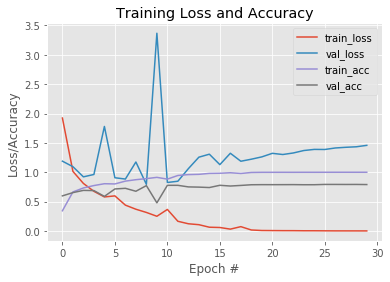

In [ ]:
# Imports que vamos a necesitar
from keras.datasets import cifar10
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras.layers import Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from keras.engine import Model
from sklearn.metrics import classification_report
import numpy as np

#Cargamos el dataset CIFAR10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar la VGG16 en imageNet
X_train = imagenet_utils.preprocess_input(X_train)
X_test = imagenet_utils.preprocess_input(X_test)

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases
input_shape = (32, 32, 3)
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

# En caso de inestabilidades numéricas pasar datos a one-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)


# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
# Mostramos la arquitectura
base_model.summary()

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers: 
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(200, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
# ¿tiene sentido en comparación al ejemplo de transfer learning?
model.summary()

# Entrenamos el modelo
H = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=256, epochs=30, verbose=1)

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(X_test, batch_size=64)
# Obtener el report de clasificación
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 30), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

- Tras la ejecución del ejercicio, **¿que se puede decir sobre la precisión del modelo obtenido?** A pesar del claro efecto de *overfitting* que evidencian las gráficas, **¿son buenos los resultados obtenidos para el conjunto de test?¿Son comparables con los obtenidos con la CNN que se propuso en la práctica anterior?**



---



Una de las técnica más empleadas en soluciones basadas en **CNNs** para **mitigar** el efecto de ***overfitting*** es la **generación sintética de nuevas muestras (o data augmenation)** a partir de diferentes transformaciones geométricas (i.e. giros, traslaciones, rotaciones, escalados, emborronamientos, zooms, etc.). Bien es cierto que hay que andar con cuidado a la hora de aplicar esta técnica ya que las nuevas imágenes generadas sintéticamente toman la clase de la imagen origen, con lo cual, las transformaciones no pueden ser muy exageradas, y mucho menos ocasionar que se parezcan a otra clase.

**EJERCICIO 3.** Para aprender cómo poner en práctica esta técnica **empleando la librería Keras** vamos a aplicar **data augmentation** con el objetivo de **reducir el efecto de overfitting** que se producía en el ejercicio anterior. Para ello, deberemos modificar el jercicio anterior atendiendo a los siguientes aspectos:

1.   Crear un objeto *ImageDataGenerator* para el entrenamiento (que almacenaremos en una variable que llamaremos **```datagen_train```**) indicando las transformaciones geométricas que queremos realizar y con que parámetros:

>>- **```Rotation_range=15, width_shift_range=0.1,  height_shift_range=0.1,  zoom_range=0.1, horizontal_flip=True```**
>>- Además debemos especificar ya aquí que nuestro conjunto de training será dividido en una **20% para la validación** del modelo.

2. Aplicar el método **```flow```** creando **dos generadores de datos**, uno de **entrenamiento** (almacenarlo en **```train_datagen```**) y otro de **validación** (almacenarlo en **```val_datagen```**). Para generarlos utilizaremos el ```datagen_train``` pasandole los datos y etiquetas de entrenamiento. Pasad como parámetro un **```batch_size=128```** para ambos generadores de datos.

4. Realizar el proceso de entrenamiento empleando la función **```fit_generator```** en lugar de ```fit```. Tendremos que pasar como parámetros de entrada el generador con los datos de entrenamiento (**```train_datagen```**), el número de pasos por época en entrenamiento que vendrá dado por la loongitud de los datos de entrenamiento dividido del tamaño de batch, el generador con los datos de validación (**```val_datagen```**) y el número de pasos por época en validación y el número de epocas (**```n_epochs=30```**).

**Nota 1.** Es muy importante entender los parámetros de entrada tanto del objeto *ImageDataGenerator* como de lo que hace la función ```flow``` y como funciona ```fit_generator```. Para ello, leed atentamente la documentación de Keras.

**Nota 2.** Al realizar el aumento de datos, el proceso de entrenamiento es bastante costoso. Se recomienda almacenar en Google Drive el modelo generado.



In [ ]:
from keras.datasets import cifar10
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras.layers import Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from keras.engine import Model
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from keras.optimizers import Adam
import numpy as np

#Cargamos el dataset CIFAR10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar la VGG16 en imageNet
X_train = imagenet_utils.preprocess_input(X_train) 
X_test = imagenet_utils.preprocess_input(X_test) 

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases
input_shape = (32, 32, 3) 
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"] 


# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape) 
# Mostramos la arquitectura
base_model.summary() 



# Data generators para poder hacer data augmentation
print('Usando real-time data augmentation.')
datage_train=ImageDataGenerator( rotation_range=int(180*0.1), width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True, validation_split=0.2,)

# Aplicamos comando flow pasando los datos y etiquetas
train_datagen = datagen_train.flow(X_train, y_train, batch_size=128, subset='training') 
val_datagen = datagen_train.flow(X_train, y_train, batch_size=128, subset='validation')

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers: 
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(200, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
model.summary()

# Calculemos el parámetro steps_per_epoch para establecer el orden de magnitud de nuestro data augmentation
# Se debe tener en cuenta que estamos empleando el 80% del training set para entrenar y el 20% para validar
# Vamos a asumir que queremos crear dos muestras por cada una que tenemos en el training_set 


# Entrenamos el modelo
H = model.fit_generator(train_datagen, steps_per_epoch=np.ceil(X_train.shape[0]*0.8/128), epochs=30, validation_data=val_datagen, validation_steps=np.ceil(X_train.shape[0]*0.2/128), verbose=1) #(X)


# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras
model.save("/content/drive/My Drive/Curso_DL_CFP/Modelos/deepCNN") #(X)


# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos predicciones
predictions = model.predict(X_test, batch_size=64)
# Evaluamos
print(classification_report(y_test, predictions.argmax(axis=1), target_names=labelNames))  


# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 30), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

NameError: ignored

- Tras la ejecución del ejercicio, **¿que se puede decir sobre la precisión del modelo obtenido?**, **¿se aprecian ahora signos de overfitting?**, **¿son buenos los resultados obtenidos para el conjunto de test?, ¿son comparables con los obtenidos con la CNN que se propuso en la práctica anterior?**



---



Para finalizar con la última práctica del curso vamos a intentar entender un poco más en profundidad que ocurre dentro de una CNN. Para conseguirlo debemos saber que existen dos cosas fundamentales que podemos visualizar:

-  **Los mapas de activaciones a la salida de las capas.** Son simplemente los resultados que obtenemos a la salida de una determinada capa durante el *forward pass*. Normalmente, cuando visualizamos las activaciones de una red con activaciones de tipo ReLU, necesitamos unas cuantas épocas antes de empezar a ver algo útil. Una cosa para la que son muy útiles es para ver si algún filtro está completamente negro para diferentes entradas, es decir, todos sus elementos son siempre 0. Esto significa que el filtro está muerto, y normalmente pasa cuando entrenamos con learning rates altos.

- **Los filtros aprendidos de los bloques convolucionales**. Normalmente, estos filtros son más interpetables en las primeras capas de la red que en las últimas. Sobre todo, es útil visualizar los filtros de la primera, que está mirando directamente a las imágenes de entrada. Una red bien entrenada tendrá filtros perfectamente definidos, al menos en las primeras capas, y sin practicamente ruido. Si por el contrario tuviésemos filtros con mucho ruido podría deberse a que hace falta entrenar más la red, o a que tenemos overfitting y necesitamos algún método de regularización.


A continuación vamos a llevar a cabo un ejemplo para poner todo lo anterior en práctica. **En primer lugar**, vamos a ver cómo se pueden **visualizar las activaciones de la última capa de nuestra CNN** (llamadas ***saliency map***). Para ello, necesitamos **cambiar la activación de la última capa**, de softmax **a lineal**, para una correcta visualización y antes que nada debemos instalar una librería que nos permita visualizar el interior de las CNNs denominada ***keras-vis***.

In [ ]:
#!pip install keras-vis
#!pip install git+https://github.com/raghakot/keras-vis.git@137f268b77f40a12d373db17da74dcc9fe759680
!pip install git+https://github.com/raghakot/keras-vis.git -U
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

In [ ]:
# Importamos la VGG16 con los pesos de ImageNet y su top_model original
model = VGG16(weights='imagenet', include_top=True)

# Compilamos el modelo
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Buscamos la capa que estamos interesados en visualizar empleando el método find_layer_idx
layer_idx = utils.find_layer_idx(model, 'predictions')

# Cambiamos la activación softmax por la función de activación lineal y aplicamos modificaciones
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

Acto seguido **cargamos un par de imágenes** sobre las que vamos a ver los mapas de activaciones.

In [ ]:
# Imports necesarios
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6) # tamaño de las imágenes

# Cargamos dos imágenes
img1 = utils.load_img('https://image.ibb.co/ma90yJ/ouzel2.jpg', target_size=(224, 224))
img2 = utils.load_img('https://image.ibb.co/djhyky/ouzel1.jpg', target_size=(224, 224))

# Las mostramos
f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[0].grid(False)
ax[1].imshow(img2)
ax[1].grid(False)

La función que se encarga de mostrarnos el mapa de activación es **```visualize_saliency```** perteneciente al módulo de visualización de la librería ***keras-vis***. A dicha función tenemos que **pasarle el modelo, el ID de la capa, el ID de la clase para la que queremos ver las activaciones, y la imagen para la que queremos ver las activaciones**.

¿Y qué es eso del **ID de la clase** para la que queremos ver las activaciones? Pues ese ID es un **identificador único que tiene cada una de las 1000 clases del dataset ImageNet**. La clase pájaro es la ID=20, por lo cual, si introducimos una imagen de un pájaro, debería activarse bastante dicha clase, e indicarnos en qué se fija para decidir que efectivamente es un pájaro. Si para la misma imagen de entrada (un pájaro) utilizamos ID=64, la red buscaría una *green mamba*, que es una serpiente (como la de la figura de la derecha) por lo que las activaciones deberían ser mucho menores. Vamos a **visualizar** las **activaciones** de la **neurona ID=20** para nuestras imágenes de entrada.

![Paj_serp](https://drive.google.com/uc?id=1RcJ2tFw4_lLtwTHK8xUl0QpsMTK1-MF2)

Para conocer el listado completo de las 1000 clases de ImageNet con sus correspondiente IDs haced click en el siguiente enlace: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [ ]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

# Con esta línea encontramos el índice de la capa predicciones, que es la que queremos ver sus activaciones
layer_idx = utils.find_layer_idx(model, 'predictions')
print('Número de capa: ', layer_idx)

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    
    # 20: 'water ouzel, dipper'
    grads = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=img, backprop_modifier='guided')
    
    # Vamos a ver las activaciones con el colormap=jet, que es adecuado para ver mapas de probabilidades
    ax[i].imshow(grads, cmap='jet')
    ax[i].grid(False)

 A continuación, vamos a probar **otro método de visualización**: el ***cam-saliency***. En este caso, la visualización contiene **más detalles**, ya que **hace uso de la información** no solo de la capa indicada, sino **de la anterior capa Conv o Pool** que encuentre. En nuestro caso sera la capa *max_pool5*.

In [ ]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam, overlay

plt.figure()
f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
  
  # Como no le hemos indicado el parámetro penultimate_layer_idx, escoge la primera que encuentra, que es la max_pool5
  grads = visualize_cam(model, layer_idx, filter_indices=20, seed_input=img, backprop_modifier='guided')        
        
  # Sobreponemos el mapa de activaciones en la imagen original
  jet_heatmap = np.uint8(cm.jet(grads) * 255)[:, :, 0:3]
  ax[i].imshow(overlay(jet_heatmap, img))
  ax[i].grid(False)

¿Qué os ha parecido esto?¿En qué **partes del pájaro** está prestando **atención** la **CNN** para tomar una decisión y **clasificar**?



---



Una vez vistos los mapas de activación, vamos a proceder a ver distintos **filtros de diferentes capas convolucionales**. En primer lugar, vamos a visualizar los filtros de la **primera capa convolucional**:



In [ ]:
from vis.visualization import visualize_activation, get_num_filters

# Buscamos el índice de la capa cuyos filtros queremos visualizar
layer_name = 'block1_conv2'
layer_idx = utils.find_layer_idx(model, layer_name)

# Creamos un array con valores de 0 al núm de filtros a visualizar (en nuestro caso 4 por motivos temporales)
filters = np.arange(4)

# Guardamos cada filtro en vis_images
plt.rcParams['figure.figsize'] = (18, 6) # Tamaño de las imágenes de los filtros
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # Escribimos el índice del filtro
    img = utils.draw_text(img, 'Filter {}'.format(idx))    
    vis_images.append(img)

# Generamos una imagen donde se visualizen todos
stitched = utils.stitch_images(vis_images, cols=8)    
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

Para finalizar, vamos a **visualizar filtros** de diferentes capas pertenecientes a **distintos bloques convolucionales**:

In [ ]:
selected_indices = []
for layer_name in ['block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']:
    layer_idx = utils.find_layer_idx(model, layer_name)

    # seleccionamos aleatoriamente 4 filtros de cada capa
    filters = np.random.permutation(get_num_filters(model.layers[layer_idx]))[:4]
    selected_indices.append(filters)

    # generamos el mapa de activaciones
    vis_images = []
    for idx in filters:
        img = visualize_activation(model, layer_idx, filter_indices=idx)

        # escribimos el número de filtro
        img = utils.draw_text(img, 'Filter {}'.format(idx))    
        vis_images.append(img)

    # generamos la imagen final a visualizar
    stitched = utils.stitch_images(vis_images, cols=4)
    plt.figure()
    plt.axis('off')
    plt.imshow(stitched)
    plt.show()